### 클립보드로 데이터 가져오기

In [1]:
import pandas as pd
import sys

# --------------------------------------------------------------------------
# 1. 클립보드에서 데이터 읽어와서 district_data 생성
# --------------------------------------------------------------------------
print("클립보드의 데이터를 읽어옵니다...")
print("엑셀/스프레드시트에서 데이터를 복사(Ctrl+C)했는지 확인해주세요.")
print("Colab에서 클립보드 접근 권한 요청 시 [허용]을 눌러주세요.")

try:
    # 클립보드에서 데이터를 DataFrame으로 읽어옵니다.
    df = pd.read_clipboard()

    # 데이터가 비어 있는지 확인
    if df.empty:
        raise ValueError("클립보드에 데이터가 없습니다. 엑셀/시트에서 데이터를 복사 후 이 셀을 다시 실행해주세요.")

    # 컬럼 이름 확인 (시군구, 라벨, 비율이 포함되어야 함)
    # 이미지의 컬럼명: '시도', '시군구', '라벨', '비율'
    # 데이터 복사 시 컬럼명이 포함되었는지 확인
    print("\n읽어온 데이터의 첫 5줄:")
    print(df.head())
    
    # 필요한 컬럼만 선택하고 이름 변경
    # 원본 데이터 순서에 맞춰 컬럼 인덱스(1, 2, 3) 사용
    df = df.iloc[:, [1, 2, 3]] 
    df.columns = ['district', 'label', 'ratio']
    
    # '비율' 컬럼을 숫자로 변환 (e.g., '12.19%' -> 12.19)
    df['ratio'] = df['ratio'].astype(str).str.replace('%', '', regex=False).astype(float)

    # DataFrame을 중첩 딕셔너리 형태로 변환
    district_data = {}
    for district, group in df.groupby('district'):
        district_data[district] = dict(zip(group['label'], group['ratio']))
    
    print("\n데이터 처리 완료! 'district_data' 변수가 생성되었습니다.")
    print("이제 아래의 [셀 2]를 실행하여 차트를 그리세요.")

except Exception as e:
    print(f"\n[오류 발생] 데이터 처리 중 문제가 발생했습니다: {e}")
    # 오류가 발생하면, 시각화 코드가 실행되지 않도록 district_data를 None으로 설정
    district_data = None
    

클립보드의 데이터를 읽어옵니다...
엑셀/스프레드시트에서 데이터를 복사(Ctrl+C)했는지 확인해주세요.
Colab에서 클립보드 접근 권한 요청 시 [허용]을 눌러주세요.

읽어온 데이터의 첫 5줄:
      시도  시군구         라벨      비율
0  서울특별시  중랑구  30% 이상 상승   0.14%
1  서울특별시  중랑구  20~30% 상승   0.46%
2  서울특별시  중랑구  10~20% 상승   0.59%
3  서울특별시  중랑구   0~10% 상승   6.61%
4  서울특별시  중랑구  0~-10% 하락  12.19%

데이터 처리 완료! 'district_data' 변수가 생성되었습니다.
이제 아래의 [셀 2]를 실행하여 차트를 그리세요.


### 엑셀 파일 Upload

In [8]:
import pandas as pd
import sys
from pathlib import Path # 파일 경로를 다루기 위해 pathlib 라이브러리 추가

# --------------------------------------------------------------------------
# 1. 다운로드 폴더에서 엑셀 파일을 읽어와서 district_data 생성
# --------------------------------------------------------------------------

# 불러올 파일 이름
file_name = '전고점 진단_시군구.xlsx'

try:
    # 현재 사용자 홈 디렉토리의 'Downloads' 폴더 경로를 자동으로 찾습니다.
    # Windows: C:/Users/<사용자명>/Downloads
    # macOS: /Users/<사용자명>/Downloads
    downloads_path = Path.home() / "Downloads"
    file_path = downloads_path / file_name

    print(f"다운로드 폴더에서 '{file_name}' 파일을 불러옵니다...")
    print(f"예상 파일 경로: {file_path}")

    # 파일이 존재하는지 확인
    if not file_path.exists():
        raise FileNotFoundError(f"다운로드 폴더에 '{file_name}' 파일이 없습니다. 파일 이름과 위치를 확인해주세요.")

    # 엑셀 파일에서 데이터를 DataFrame으로 읽어옵니다.
    df = pd.read_excel(file_path)

    # 데이터가 비어 있는지 확인
    if df.empty:
        raise ValueError("파일을 열었지만 데이터가 비어있습니다. 파일 내용을 확인해주세요.")

    # 컬럼 이름 확인
    print("\n읽어온 데이터의 첫 5줄:")
    print(df.head())
    
    # 필요한 컬럼만 선택하고 이름 변경 (기존 코드와 동일)
    # 원본 데이터 순서에 맞춰 컬럼 인덱스(1, 2, 3) 사용
    df = df.iloc[:, [1, 2, 3]] 
    df.columns = ['district', 'label', 'ratio']
    
    # '비율' 컬럼을 숫자로 변환 (기존 코드와 동일)
    df['ratio'] = df['ratio'].astype(str).str.replace('%', '', regex=False).astype(float)

    # DataFrame을 중첩 딕셔너리 형태로 변환 (기존 코드와 동일)
    district_data = {}
    for district, group in df.groupby('district'):
        district_data[district] = dict(zip(group['label'], group['ratio']))
    
    print("\n데이터 처리 완료! 'district_data' 변수가 생성되었습니다.")
    print("이제 아래의 [셀 2]를 실행하여 차트를 그리세요.")

except FileNotFoundError as e:
    print(f"\n[오류 발생] 파일을 찾을 수 없습니다: {e}")
    district_data = None
except Exception as e:
    print(f"\n[오류 발생] 데이터 처리 중 문제가 발생했습니다: {e}")
    print("파일 형식(xlsx)이 맞는지, 데이터 컬럼이 올바른지 확인해주세요.")
    # 오류가 발생하면, 시각화 코드가 실행되지 않도록 district_data를 None으로 설정
    district_data = None

다운로드 폴더에서 '전고점 진단_시군구.xlsx' 파일을 불러옵니다...
예상 파일 경로: /Users/foodie/Downloads/전고점 진단_시군구.xlsx

읽어온 데이터의 첫 5줄:
      시도  시군구         라벨      비율
0  서울특별시  중랑구  30% 이상 상승  0.0014
1  서울특별시  중랑구  20~30% 상승  0.0046
2  서울특별시  중랑구  10~20% 상승  0.0059
3  서울특별시  중랑구   0~10% 상승  0.0661
4  서울특별시  중랑구  0~-10% 하락  0.1219

데이터 처리 완료! 'district_data' 변수가 생성되었습니다.
이제 아래의 [셀 2]를 실행하여 차트를 그리세요.


### 파이 차트 그리기

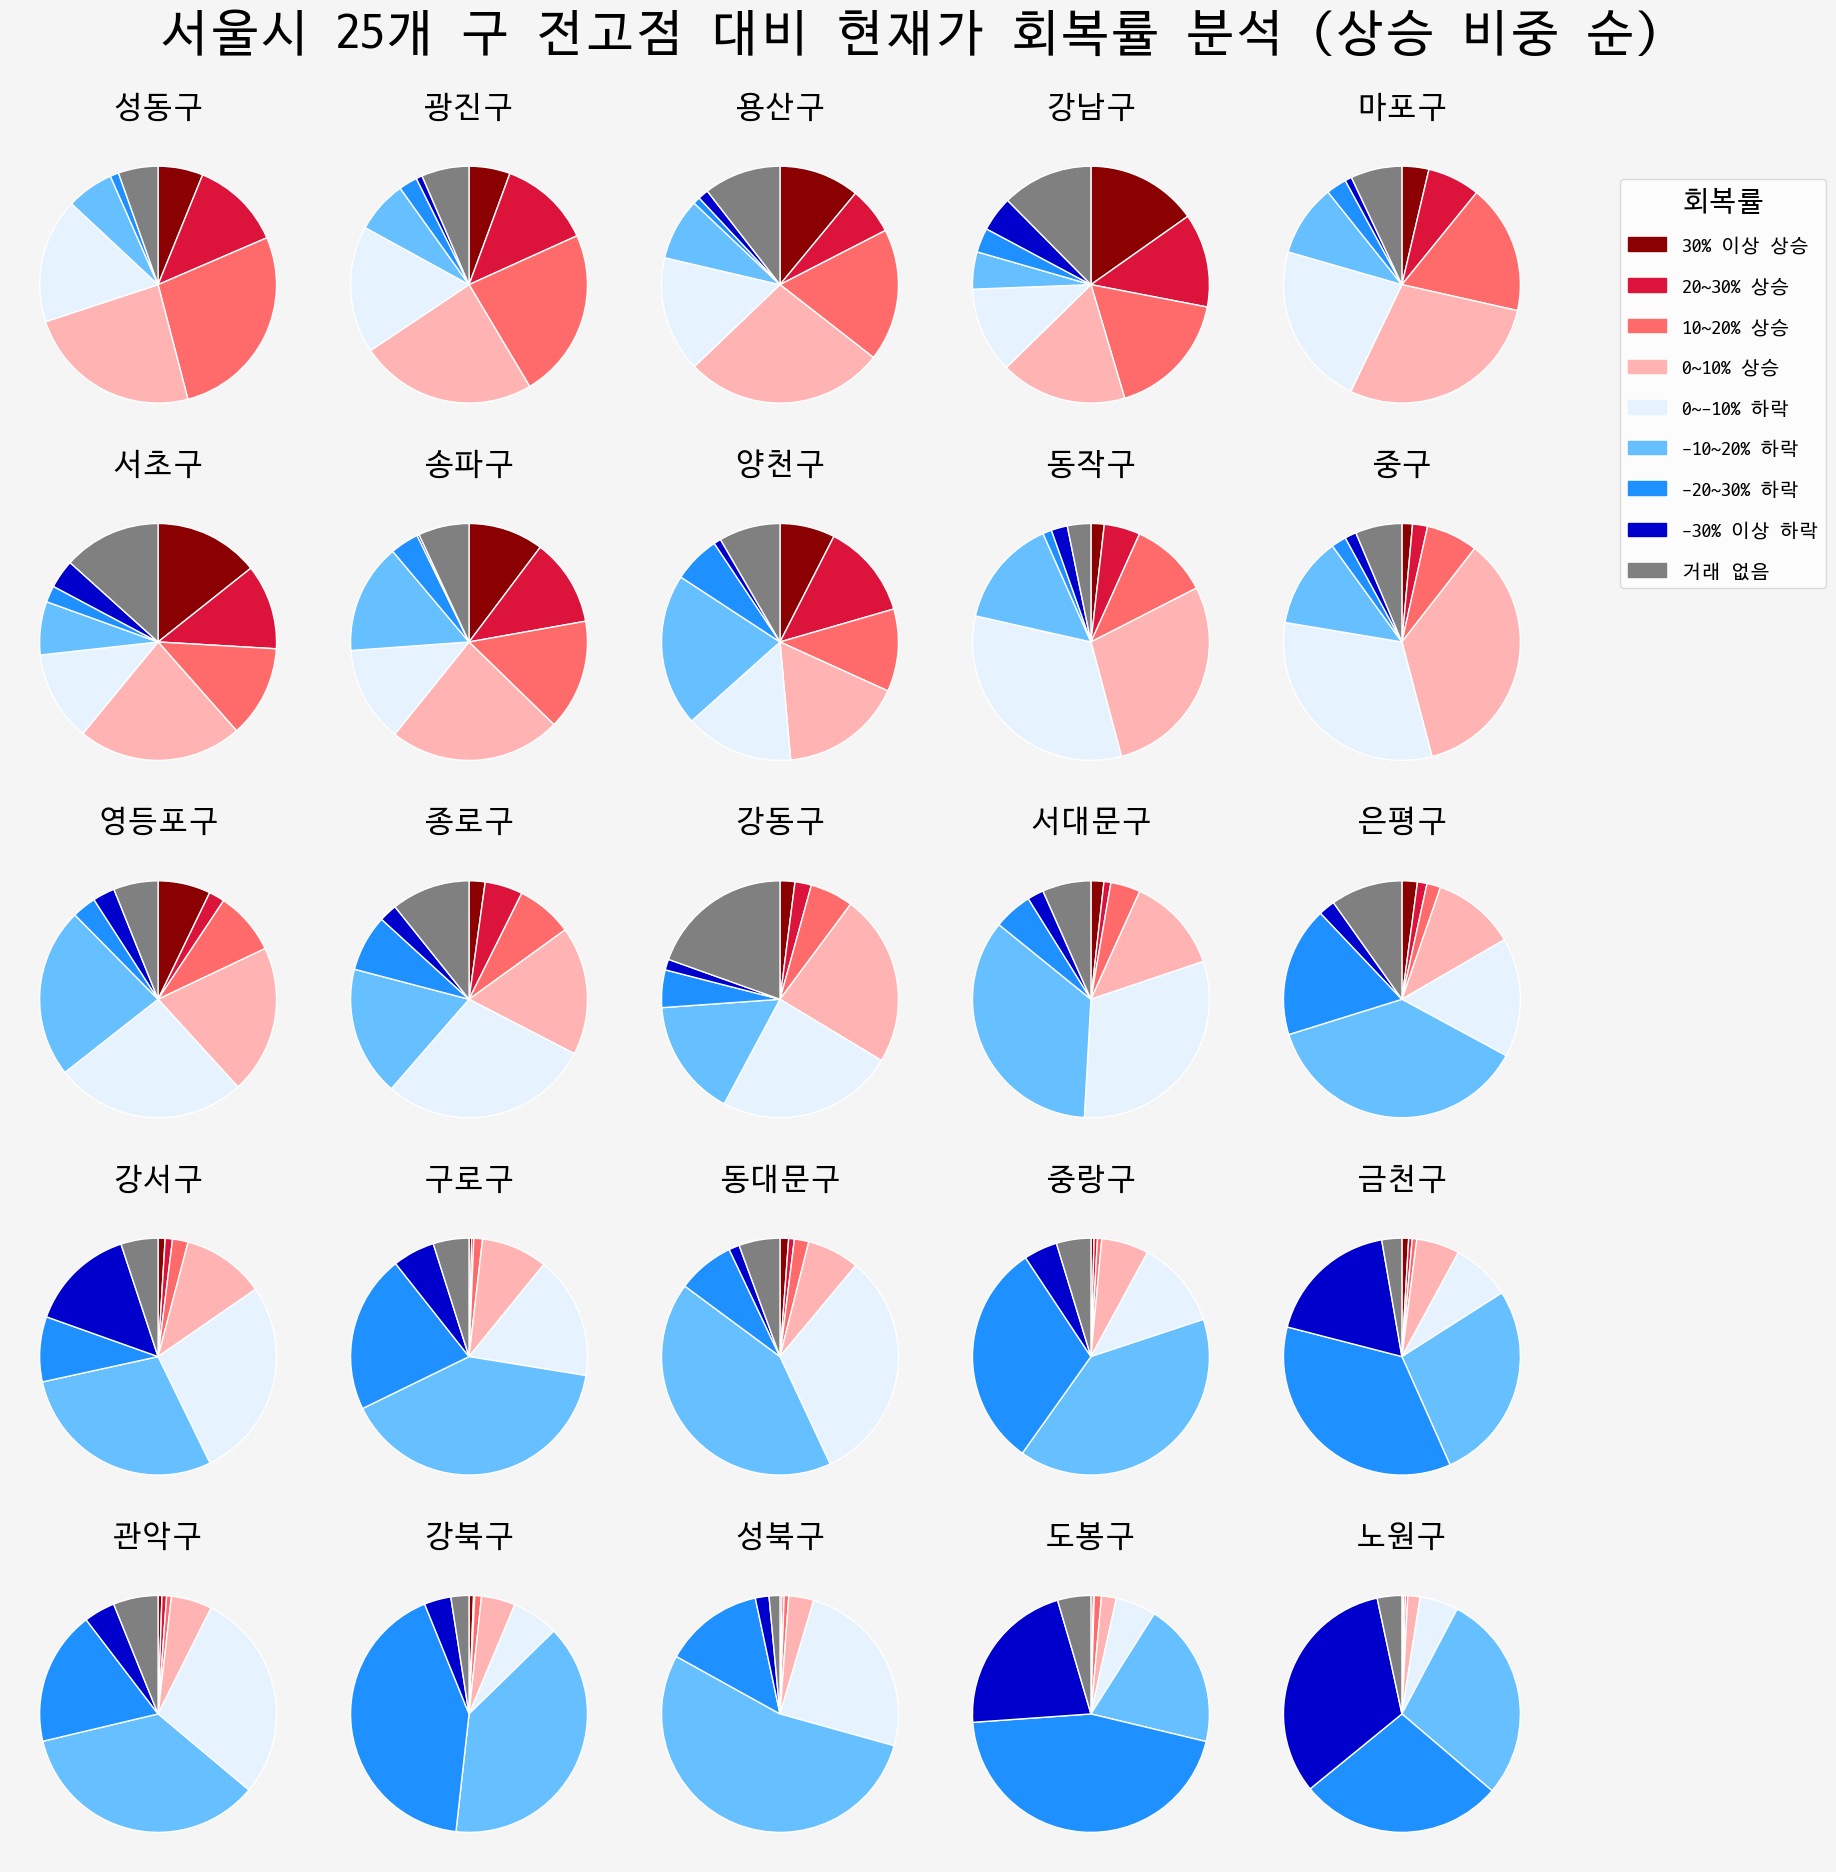

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --------------------------------------------------------------------------
# 0. 데이터가 준비되었는지 확인
# --------------------------------------------------------------------------
if 'district_data' not in globals() or district_data is None:
    print("[오류] 'district_data'가 생성되지 않았습니다. 위의 [셀 1]을 먼저 실행해주세요.")
else:
    # --------------------------------------------------------------------------
    # 1. 한글 폰트 및 시각화 설정
    # --------------------------------------------------------------------------
    plt.rc('font', family='D2Coding')  # D2Coding 폰트 설정
    plt.rcParams['axes.unicode_minus'] = False

    districts_ordered = [
        '성동구', '광진구', '용산구', '강남구', '마포구', '서초구', '송파구', '양천구', '동작구', '중구',
        '영등포구', '종로구', '강동구', '서대문구', '은평구', '강서구', '구로구', '동대문구', '중랑구', '금천구',
        '관악구', '강북구', '성북구', '도봉구', '노원구'
    ]
    colors = {
        '30% 이상 상승': '#8B0000', '20~30% 상승': '#DC143C', '10~20% 상승': '#FF6B6B', '0~10% 상승': '#FFB3B3',
        '0~-10% 하락': '#E6F3FF', '-10~20% 하락': '#66BFFF', '-20~30% 하락': '#1E90FF', '-30% 이상 하락': '#0000CD',
        '거래 없음': '#808080'
    }

    # --------------------------------------------------------------------------
    # 2. 시각화 구현
    # --------------------------------------------------------------------------
    fig, axes = plt.subplots(5, 5, figsize=(20, 20))
    fig.patch.set_facecolor('#f5f5f5')
    fig.suptitle('서울시 25개 구 전고점 대비 현재가 회복률 분석 (상승 비중 순)', fontsize=36, y=0.98, fontweight='bold')

    for i, district_name in enumerate(districts_ordered):
        row, col = divmod(i, 5)
        ax = axes[row, col]

        if district_name not in district_data:
            ax.set_title(f"{district_name}\n(데이터 없음)", fontsize=18, pad=15, color='gray')
            ax.axis('off')
            continue

        data = district_data[district_name]
        filtered_data = {label: value for label, value in data.items() if value > 0}
        
        if not filtered_data:
            ax.set_title(f"{district_name}\n(표시할 데이터 없음)", fontsize=18, pad=15, color='gray')
            ax.axis('off')
            continue

        chart_labels = list(filtered_data.keys())
        chart_values = list(filtered_data.values())
        chart_colors = [colors.get(label, '#CCCCCC') for label in chart_labels] # 없는 라벨 대비
        
        ax.pie(chart_values, 
            colors=chart_colors, 
            startangle=90, 
            counterclock=False,
            wedgeprops={'edgecolor': 'white', 'linewidth': 1})
        
        ax.set_title(district_name, fontsize=22, pad=15)

    # --------------------------------------------------------------------------
    # 3. 범례 생성 및 배치
    # --------------------------------------------------------------------------
    legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
    fig.legend(handles=legend_patches, title='회복률', title_fontsize='20', loc='upper left',
            bbox_to_anchor=(0.85, 0.9), fontsize='14', facecolor='white',
            edgecolor='lightgray', frameon=True, labelspacing=1.2)

    plt.subplots_adjust(left=0.05, right=0.82, top=0.92, bottom=0.05, wspace=0.05, hspace=0.15)
    plt.show()

### 전저점 대비 최근 실거래가 회복률

In [1]:
import pandas as pd
import sys
from pathlib import Path # 파일 경로를 다루기 위해 pathlib 라이브러리 추가

# --------------------------------------------------------------------------
# 1. 다운로드 폴더에서 엑셀 파일을 읽어와서 district_data 생성
# --------------------------------------------------------------------------

# 불러올 파일 이름
file_name = '전저점 진단_시군구.xlsx'

try:
    # 현재 사용자 홈 디렉토리의 'Downloads' 폴더 경로를 자동으로 찾습니다.
    # Windows: C:/Users/<사용자명>/Downloads
    # macOS: /Users/<사용자명>/Downloads
    downloads_path = Path.home() / "Downloads"
    file_path = downloads_path / file_name

    print(f"다운로드 폴더에서 '{file_name}' 파일을 불러옵니다...")
    print(f"예상 파일 경로: {file_path}")

    # 파일이 존재하는지 확인
    if not file_path.exists():
        raise FileNotFoundError(f"다운로드 폴더에 '{file_name}' 파일이 없습니다. 파일 이름과 위치를 확인해주세요.")

    # 엑셀 파일에서 데이터를 DataFrame으로 읽어옵니다.
    df = pd.read_excel(file_path)

    # 데이터가 비어 있는지 확인
    if df.empty:
        raise ValueError("파일을 열었지만 데이터가 비어있습니다. 파일 내용을 확인해주세요.")

    # 컬럼 이름 확인
    print("\n읽어온 데이터의 첫 5줄:")
    print(df.head())
    
    # 필요한 컬럼만 선택하고 이름 변경 (기존 코드와 동일)
    # 원본 데이터 순서에 맞춰 컬럼 인덱스(1, 2, 3) 사용
    df = df.iloc[:, [1, 2, 3]] 
    df.columns = ['district', 'label', 'ratio']
    
    # '비율' 컬럼을 숫자로 변환 (기존 코드와 동일)
    df['ratio'] = df['ratio'].astype(str).str.replace('%', '', regex=False).astype(float)

    # DataFrame을 중첩 딕셔너리 형태로 변환 (기존 코드와 동일)
    district_data = {}
    for district, group in df.groupby('district'):
        district_data[district] = dict(zip(group['label'], group['ratio']))
    
    print("\n데이터 처리 완료! 'district_data' 변수가 생성되었습니다.")
    print("이제 아래의 [셀 2]를 실행하여 차트를 그리세요.")

except FileNotFoundError as e:
    print(f"\n[오류 발생] 파일을 찾을 수 없습니다: {e}")
    district_data = None
except Exception as e:
    print(f"\n[오류 발생] 데이터 처리 중 문제가 발생했습니다: {e}")
    print("파일 형식(xlsx)이 맞는지, 데이터 컬럼이 올바른지 확인해주세요.")
    # 오류가 발생하면, 시각화 코드가 실행되지 않도록 district_data를 None으로 설정
    district_data = None

다운로드 폴더에서 '전저점 진단_시군구.xlsx' 파일을 불러옵니다...
예상 파일 경로: /Users/foodie/Downloads/전저점 진단_시군구.xlsx

읽어온 데이터의 첫 5줄:
      시도  시군구 전저점 대비 변화율        비율
0  서울특별시  중랑구  30% 이상 상승  0.004225
1  서울특별시  중랑구  20~30% 상승  0.004585
2  서울특별시  중랑구  10~20% 상승  0.005888
3  서울특별시  중랑구   0~10% 상승  0.064547
4  서울특별시  중랑구  0~-10% 하락  0.119946

데이터 처리 완료! 'district_data' 변수가 생성되었습니다.
이제 아래의 [셀 2]를 실행하여 차트를 그리세요.


### 파이 차트 - 전저점 대비 회복률

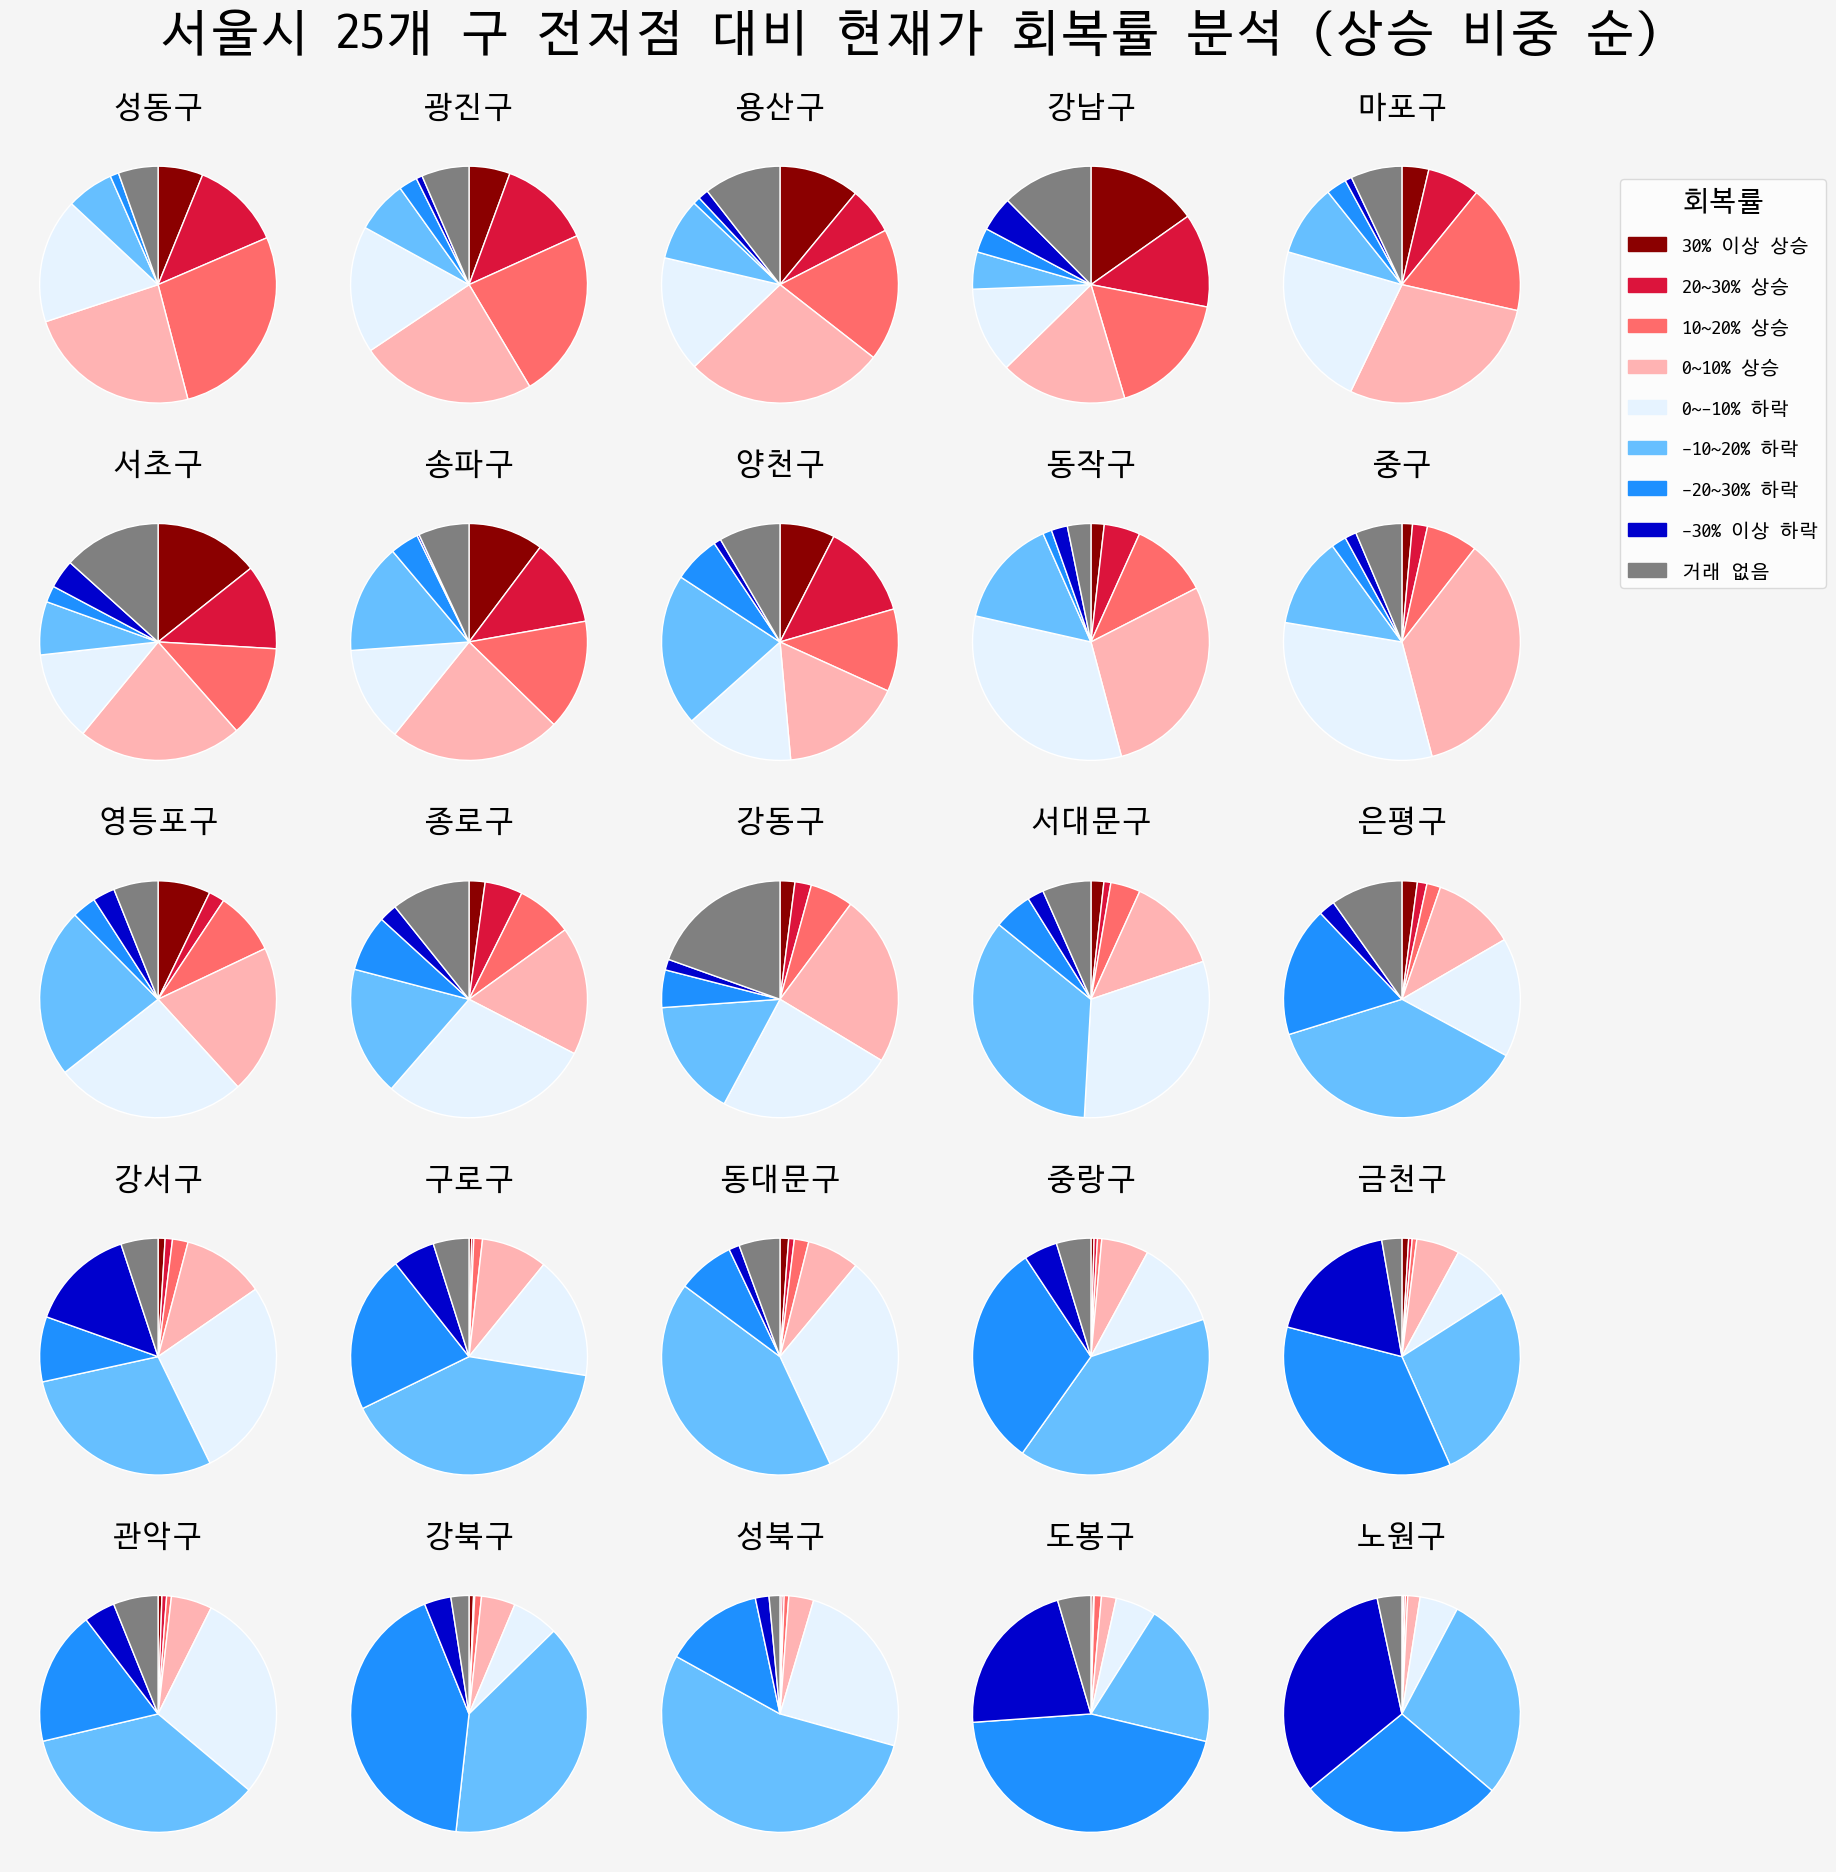

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --------------------------------------------------------------------------
# 0. 데이터가 준비되었는지 확인
# --------------------------------------------------------------------------
if 'district_data' not in globals() or district_data is None:
    print("[오류] 'district_data'가 생성되지 않았습니다. 위의 [셀 1]을 먼저 실행해주세요.")
else:
    # --------------------------------------------------------------------------
    # 1. 한글 폰트 및 시각화 설정
    # --------------------------------------------------------------------------
    plt.rc('font', family='D2Coding')  # D2Coding 폰트 설정
    plt.rcParams['axes.unicode_minus'] = False

    districts_ordered = [
        '성동구', '광진구', '용산구', '강남구', '마포구', '서초구', '송파구', '양천구', '동작구', '중구',
        '영등포구', '종로구', '강동구', '서대문구', '은평구', '강서구', '구로구', '동대문구', '중랑구', '금천구',
        '관악구', '강북구', '성북구', '도봉구', '노원구'
    ]
    colors = {
        '30% 이상 상승': '#8B0000', '20~30% 상승': '#DC143C', '10~20% 상승': '#FF6B6B', '0~10% 상승': '#FFB3B3',
        '0~-10% 하락': '#E6F3FF', '-10~20% 하락': '#66BFFF', '-20~30% 하락': '#1E90FF', '-30% 이상 하락': '#0000CD',
        '거래 없음': '#808080'
    }

    # --------------------------------------------------------------------------
    # 2. 시각화 구현
    # --------------------------------------------------------------------------
    fig, axes = plt.subplots(5, 5, figsize=(20, 20))
    fig.patch.set_facecolor('#f5f5f5')
    fig.suptitle('서울시 25개 구 전저점 대비 현재가 회복률 분석 (상승 비중 순)', fontsize=36, y=0.98, fontweight='bold')

    for i, district_name in enumerate(districts_ordered):
        row, col = divmod(i, 5)
        ax = axes[row, col]

        if district_name not in district_data:
            ax.set_title(f"{district_name}\n(데이터 없음)", fontsize=18, pad=15, color='gray')
            ax.axis('off')
            continue

        data = district_data[district_name]
        filtered_data = {label: value for label, value in data.items() if value > 0}
        
        if not filtered_data:
            ax.set_title(f"{district_name}\n(표시할 데이터 없음)", fontsize=18, pad=15, color='gray')
            ax.axis('off')
            continue

        chart_labels = list(filtered_data.keys())
        chart_values = list(filtered_data.values())
        chart_colors = [colors.get(label, '#CCCCCC') for label in chart_labels] # 없는 라벨 대비
        
        ax.pie(chart_values, 
            colors=chart_colors, 
            startangle=90, 
            counterclock=False,
            wedgeprops={'edgecolor': 'white', 'linewidth': 1})
        
        ax.set_title(district_name, fontsize=22, pad=15)

    # --------------------------------------------------------------------------
    # 3. 범례 생성 및 배치
    # --------------------------------------------------------------------------
    legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
    fig.legend(handles=legend_patches, title='회복률', title_fontsize='20', loc='upper left',
            bbox_to_anchor=(0.85, 0.9), fontsize='14', facecolor='white',
            edgecolor='lightgray', frameon=True, labelspacing=1.2)

    plt.subplots_adjust(left=0.05, right=0.82, top=0.92, bottom=0.05, wspace=0.05, hspace=0.15)
    plt.show()